<a href="https://colab.research.google.com/github/pedro-hnrq/House-Price/blob/third_model/Analise_Exploratoria_dos_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Advanced Regression Techniques


---


(Preços de Casas )

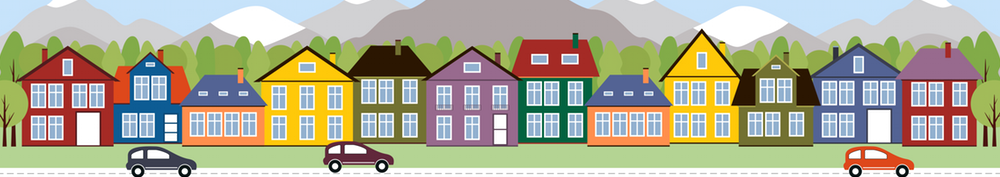

Disponível: [Preços de Casas](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)






## **3° Parte** - Análise Exploratório dos Dados

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/Resultados/train_2.csv")
test = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/Resultados/test_2.csv")

In [3]:
train.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,2,2006,WD,Abnorml,140000


In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [7]:
# Verificando a cardinalidade dos dados
train.nunique().sort_values(ascending=False).head(10)

Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
dtype: int64



*   Mantendo o Id, para ser usado submissão do nosso código
*  **Entender melhor a variável target (SalePrice)**


In [8]:
# Descrição estatística
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

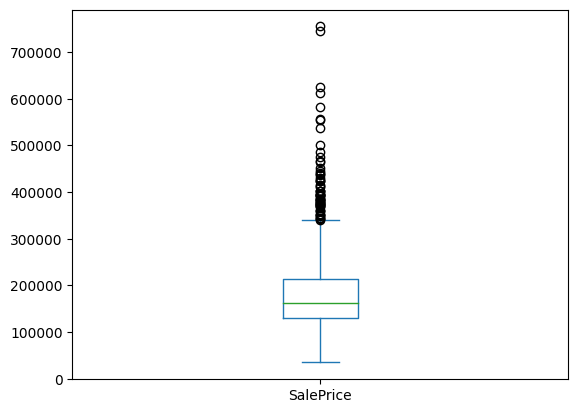

In [9]:
# Boxplot
train.SalePrice.plot.box();



*   Avaliar a diretamente a crrelação das variáveis numéricas.



In [10]:
# Verificando a correlação entre os valores
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

train.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261354
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.330222
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

Gráfico:


*   Vamos considerar as colunas OverallQual, BsmtHalfBath, KitchenAbvGr



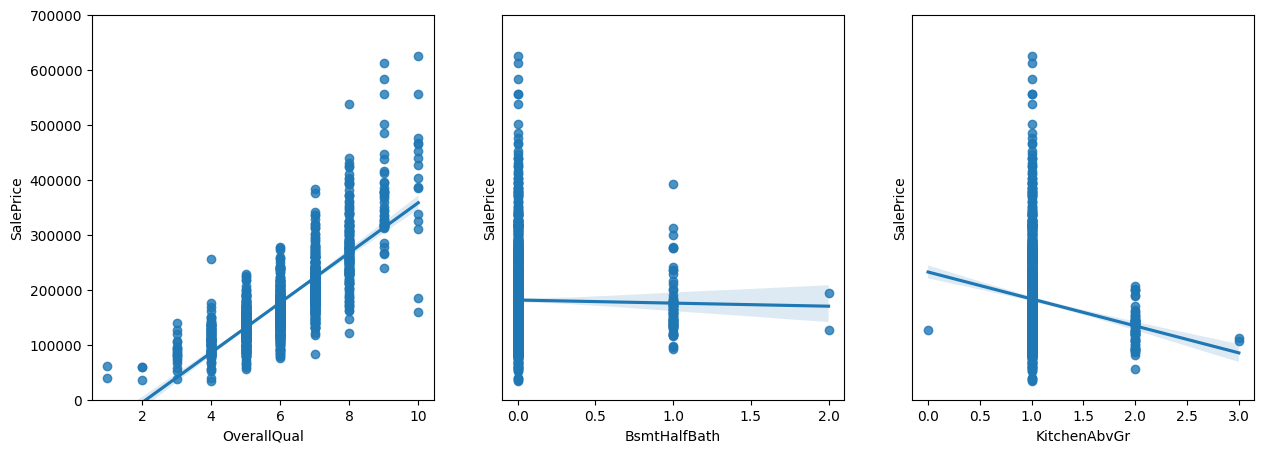

In [11]:
# Visualizando graficamente

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=3,figsize=(15,5))

sns.regplot(data=train,x='OverallQual',y='SalePrice',ax=ax[0])
sns.regplot(data=train,x='BsmtHalfBath',y='SalePrice',ax=ax[1])
sns.regplot(data=train,x='KitchenAbvGr',y='SalePrice',ax=ax[2])

ax[0].set(ylim=(0,700000))
ax[1].set(ylim=(0,700000),yticks=[])
ax[2].set(ylim=(0,700000),yticks=[])

plt.show()

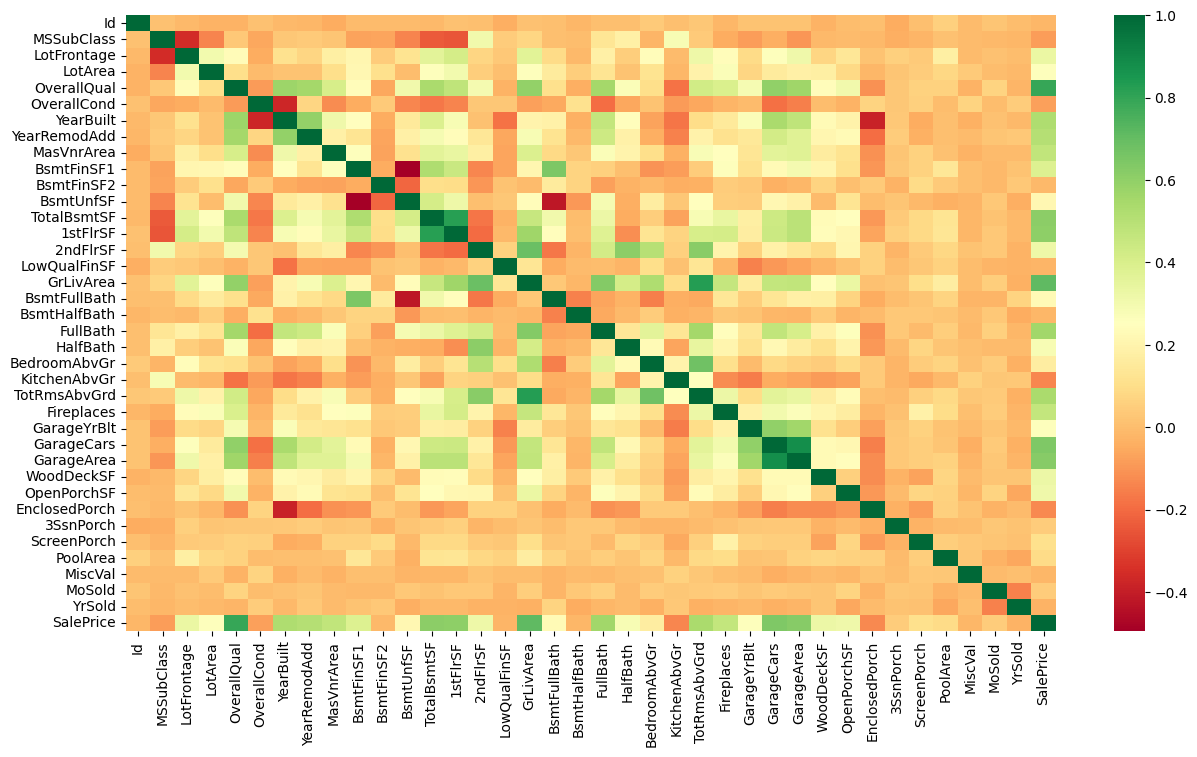

In [12]:
# O mapa de calor da correlação


# Desativar temporariamente os avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# O mapa de calor da correlação
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(), cmap='RdYlGn')
plt.show()

# Restaurar as configurações padrão dos avisos
warnings.resetwarnings()

Analisar se alguma delas possuem valores recorrentes

In [13]:
# Selecionando as colunas que vamos trabalhar
obj_cols = train.columns[train.dtypes == 'object']
obj_cols

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
# Visualizando as casas mais caras
caras = train.sort_values('SalePrice').tail(10)
caras = caras[obj_cols]
caras.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
798,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,New,Partial
178,RL,Pave,-1,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,New,Partial


In [15]:
# E também as casas mais baratas
baratas = train.sort_values('SalePrice').head(10)
baratas = baratas[obj_cols]
baratas.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
495,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,-1,-1,-1,-1,N,-1,GdWo,-1,WD,Abnorml
916,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,TA,Y,-1,-1,-1,WD,Abnorml


In [16]:
# Verificando, das casas caras, valores que muito se repetem (muitos valores iguais)
caras_val = caras.nunique()
caras_val.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MSZoning    1
Street      1
dtype: int64

In [17]:
# Verificando agora para as casas mais baratas
baratas_val = baratas.nunique()
baratas_val.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MSZoning    3
Street      2
dtype: int64

In [18]:
# Unir esses valores
rep = pd.concat([caras_val, baratas_val], axis=1).sort_values([0,1]).head(10)
rep

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1
Utilities,1,1
Condition2,1,1
Street,1,2
Condition1,1,2
BldgType,1,2
Heating,1,2
CentralAir,1,2
GarageQual,1,2
PavedDrive,1,2
MSZoning,1,3


In [19]:
# Visualizando essas colunas para as casas mais caras
caras[rep.index]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
798,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
178,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
769,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
440,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1046,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
803,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
898,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1169,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1182,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
691,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL


In [20]:
# E para as mais baratas
baratas[rep.index]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
495,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,C (all)
916,AllPub,Norm,Pave,Norm,1Fam,GasA,N,TA,Y,C (all)
968,AllPub,Norm,Pave,Norm,1Fam,Grav,N,-1,Y,RM
533,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RL
30,AllPub,Norm,Pave,Feedr,1Fam,GasA,N,TA,N,C (all)
710,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,-1,N,RL
1337,AllPub,Norm,Pave,Feedr,1Fam,Grav,N,-1,N,RM
705,AllPub,Norm,Pave,Norm,2fmCon,GasA,N,-1,N,RM
1325,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RM
812,AllPub,Norm,Grvl,Norm,1Fam,GasA,N,TA,N,C (all)


<a id="colunas"></a>
### Investigar melhor essas principais colunas

Index:

*   Utilities
*   CentralAir
*   PavedDrive
*   MSZoning
*   GarageQual

**Começar primeiramente analisando a coluna "Utilities"**







In [21]:
# Verificando os valores nessa coluna para a base de treino
train.Utilities.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [22]:
# E para a base de teste
test.Utilities.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AllPub    1459
Name: Utilities, dtype: int64

In [24]:
# Elimanando essa coluna das 2 bases
train = train.drop('Utilities', axis=1)
test = test.drop('Utilities', axis=1)

Analisando a coluna "CentralAir"

In [25]:
# Verificando os valores nessa coluna
train.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

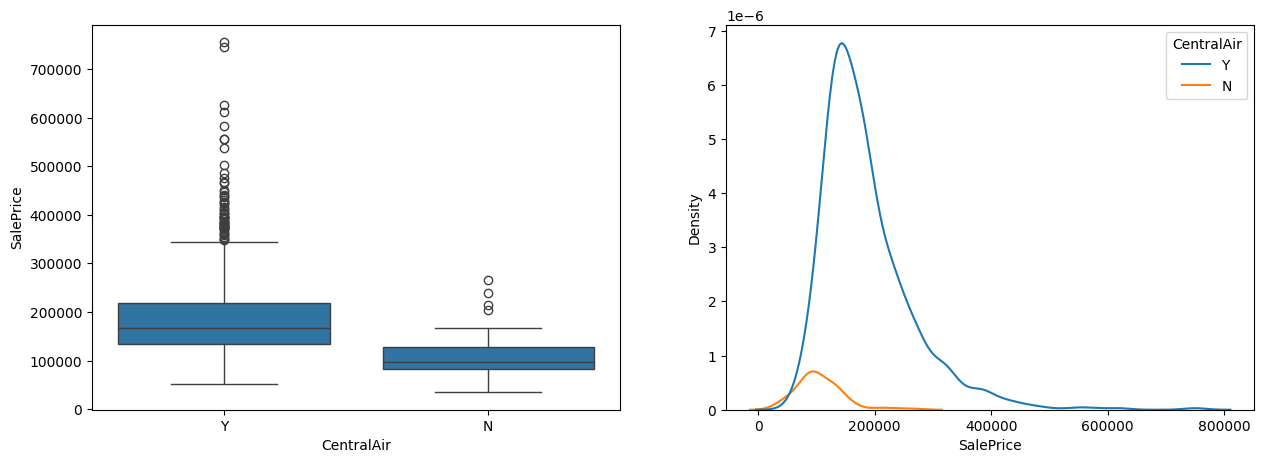

In [26]:
# Visualizando a relação com o preço
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(x=train.CentralAir,y=train.SalePrice,ax=ax[0])
sns.kdeplot(x=train.SalePrice,hue=train.CentralAir,ax=ax[1])

plt.show()

Transformar essa coluna simplesmente colocando tudo que for Y como 1 e N como 0

In [27]:
# Substituindo os valores
train['CentralAirCheck'] = train['CentralAir']
train['CentralAir'] = train.CentralAir.apply(lambda x: 1 if x == "Y" else 0)

In [28]:
# Verificando o resultado
train[['CentralAirCheck','CentralAir']].value_counts()

CentralAirCheck  CentralAir
Y                1             1365
N                0               95
dtype: int64

In [29]:
# Agora podemos apagar a coluna Check
train = train.drop('CentralAirCheck',axis=1)


In [30]:
# Aplicando a função na base de teste
test['CentralAir'] = test.CentralAir.apply(lambda x: 1 if x == "Y" else 0)

Analisar a coluna "PavedDrive" (calçada pavimentada)
* Y: Paved
* P: Partial Pavement
* N: Dirt/Gravel




In [31]:
# Verificando os valores nessa coluna
train.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [32]:
# Determinando a coluna analisada
coluna = 'PavedDrive'

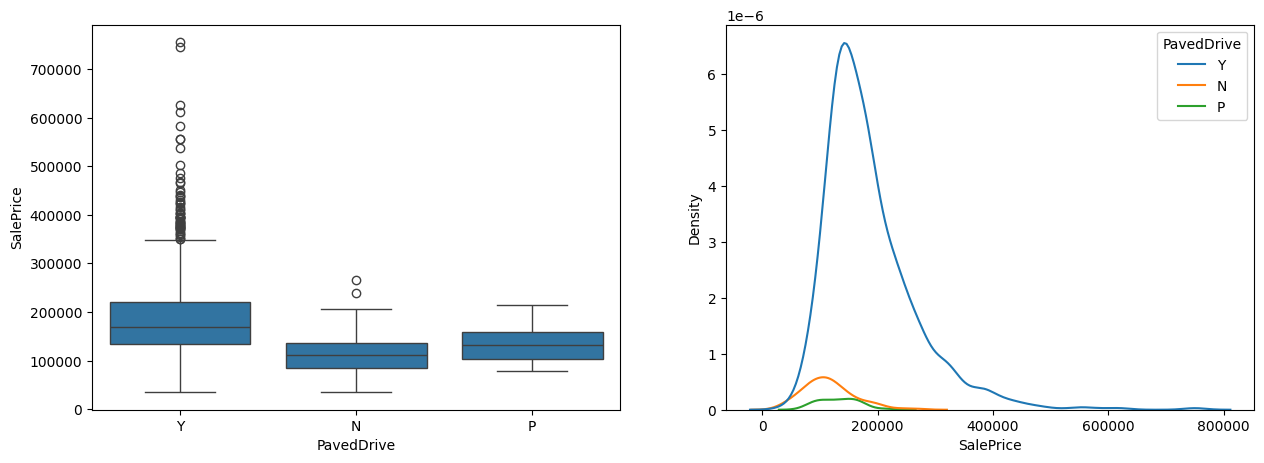

In [33]:
# Verificando a relação desses valores com o preço da casa
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(x=train[coluna],y=train.SalePrice,ax=ax[0])
sns.kdeplot(x=train.SalePrice,hue=train[coluna],ax=ax[1])

plt.show()

In [34]:
# A função
def DefinePavedDrive(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    elif x == 'P':
        return 0.5
    else:
        return -1

In [35]:
# Aplicando essa função
train['PavedDriveCheck'] = train['PavedDrive']
train['PavedDrive'] = train.PavedDrive.apply(DefinePavedDrive)

In [36]:
# Verificando o resultado
train[['PavedDriveCheck','PavedDrive']].value_counts()

PavedDriveCheck  PavedDrive
Y                1.0           1340
N                0.0             90
P                0.5             30
dtype: int64

In [37]:
# Apagar a coluna Check
train = train.drop('PavedDriveCheck',axis=1)

In [38]:
# Fazendo para a base de teste
test['PavedDrive'] = test.PavedDrive.apply(DefinePavedDrive)

Entender a relação do "*MSZoning*" com o preço


In [39]:
# Fazendo um groupby desses dados
warnings.simplefilter(action='ignore', category=FutureWarning)
train.groupby('MSZoning')['SalePrice'].agg(['mean','min','max','count','median'])

,mean,min,max,count,median
MSZoning,,,,,
C (all),74528.000000,34900,133900,10,74700.0
FV,214014.061538,144152,370878,65,205950.0
RH,131558.375000,76000,200000,16,136500.0
RL,191004.994787,39300,755000,1151,174000.0
RM,126316.830275,37900,475000,218,120500.0


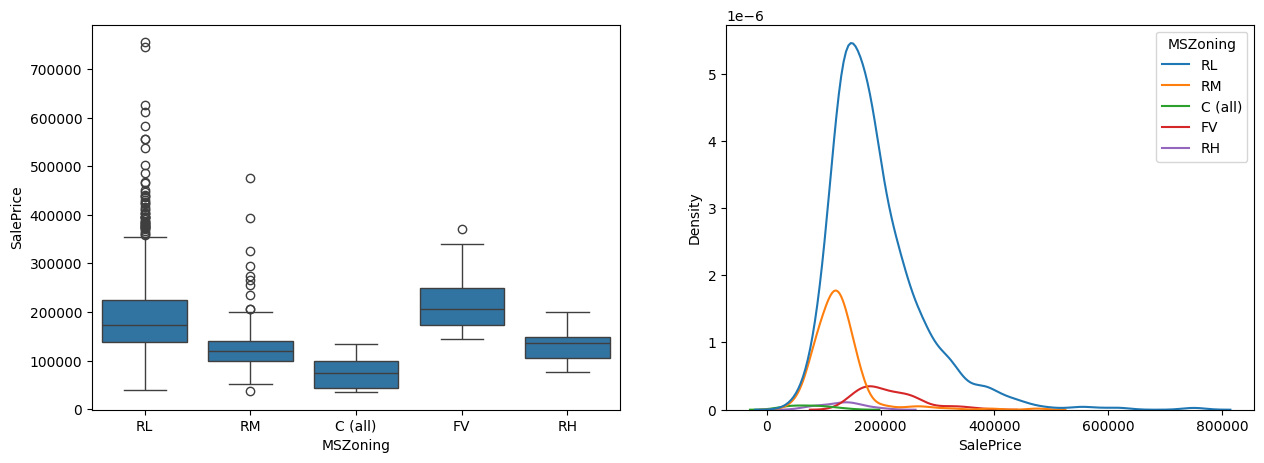

In [40]:
# A distribuição desses valores
coluna = 'MSZoning'

warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(x=train[coluna],y=train.SalePrice,ax=ax[0])
sns.kdeplot(x=train.SalePrice,hue=train[coluna],ax=ax[1])

plt.show()

Resolver o problema de variáveis textuais, utilizar agora o OneHotEncoder e transformar cada um desses valores em uma nova coluna

- [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)


In [42]:
# Importando
from sklearn.preprocessing import OneHotEncoder

In [43]:
# Criando o encoder para essa coluna
ohe_MSZoning = OneHotEncoder(handle_unknown='ignore')

In [44]:
# Fazendo o fit com os dados
ohe_MSZoning = ohe_MSZoning.fit(train[['MSZoning']])

In [45]:
# Transformando os dados
ohe_MSZoning.transform(train[['MSZoning']]).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [46]:
# Transformando isso em um DataFrame do pandas
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(train[['MSZoning']]).toarray(),
                              columns=ohe_MSZoning.get_feature_names_out())
ohe_MSZoning_df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [47]:
# Unindo essa coluna com a base
warnings.simplefilter(action='ignore', category=FutureWarning)
train = pd.concat([train,ohe_MSZoning_df],axis=1)

In [48]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,RL,65.000000,8450,Pave,-1,Reg,Lvl,Inside,...,2,2008,WD,Normal,208500,0.0,0.0,0.0,1.0,0.0
1,2,20,RL,80.000000,9600,Pave,-1,Reg,Lvl,FR2,...,5,2007,WD,Normal,181500,0.0,0.0,0.0,1.0,0.0
2,3,60,RL,68.000000,11250,Pave,-1,IR1,Lvl,Inside,...,9,2008,WD,Normal,223500,0.0,0.0,0.0,1.0,0.0
3,4,70,RL,60.000000,9550,Pave,-1,IR1,Lvl,Corner,...,2,2006,WD,Abnorml,140000,0.0,0.0,0.0,1.0,0.0
4,5,60,RL,84.000000,14260,Pave,-1,IR1,Lvl,FR2,...,12,2008,WD,Normal,250000,0.0,0.0,0.0,1.0,0.0
5,6,50,RL,85.000000,14115,Pave,-1,IR1,Lvl,Inside,...,10,2009,WD,Normal,143000,0.0,0.0,0.0,1.0,0.0
6,7,20,RL,75.000000,10084,Pave,-1,Reg,Lvl,Inside,...,8,2007,WD,Normal,307000,0.0,0.0,0.0,1.0,0.0
7,8,60,RL,84.039801,10382,Pave,-1,IR1,Lvl,Corner,...,11,2009,WD,Normal,200000,0.0,0.0,0.0,1.0,0.0
8,9,50,RM,51.000000,6120,Pave,-1,Reg,Lvl,Inside,...,4,2008,WD,Abnorml,129900,0.0,0.0,0.0,0.0,1.0
9,10,190,RL,50.000000,7420,Pave,-1,Reg,Lvl,Corner,...,1,2008,WD,Normal,118000,0.0,0.0,0.0,1.0,0.0


In [49]:
# Eliminando a coluna "MSZoning"
train = train.drop('MSZoning',axis=1)



*   Utilizando o enconder para a *base de teste*



In [50]:
# Fazendo a transformação

ohe_MSZoning.transform(test[['MSZoning']]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [51]:
# Transformando em um DataFrame (podemos sobrescrever essa variável)
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(test[['MSZoning']]).toarray(),
                              columns=ohe_MSZoning.get_feature_names_out())
ohe_MSZoning_df.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0


In [52]:
# Unindo essa coluna com a base de teste
test = pd.concat([test,ohe_MSZoning_df],axis=1)

In [53]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1461,20,RH,80.0,11622,Pave,-1,Reg,Lvl,Inside,...,0,6,2010,WD,Normal,0.0,0.0,1.0,0.0,0.0
1,1462,20,RL,81.0,14267,Pave,-1,IR1,Lvl,Corner,...,12500,6,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
2,1463,60,RL,74.0,13830,Pave,-1,IR1,Lvl,Inside,...,0,3,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
3,1464,60,RL,78.0,9978,Pave,-1,IR1,Lvl,Inside,...,0,6,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
4,1465,120,RL,43.0,5005,Pave,-1,IR1,HLS,Inside,...,0,1,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0


In [54]:
# Eliminando a coluna "MSZoning"
test = test.drop('MSZoning',axis=1)

Analisando as informações sobre garagem, começando pela "**GarageQual**"
- Ex: Excellent
- Gd: Good
- TA: Typical/Average
- Fa: Fair
- Po: Poor
- NA: No Garage -> lembrando que já substituimos esse valor por -1

In [55]:
# Verificando os valores nessa coluna
train.GarageQual.value_counts()

TA    1311
-1      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

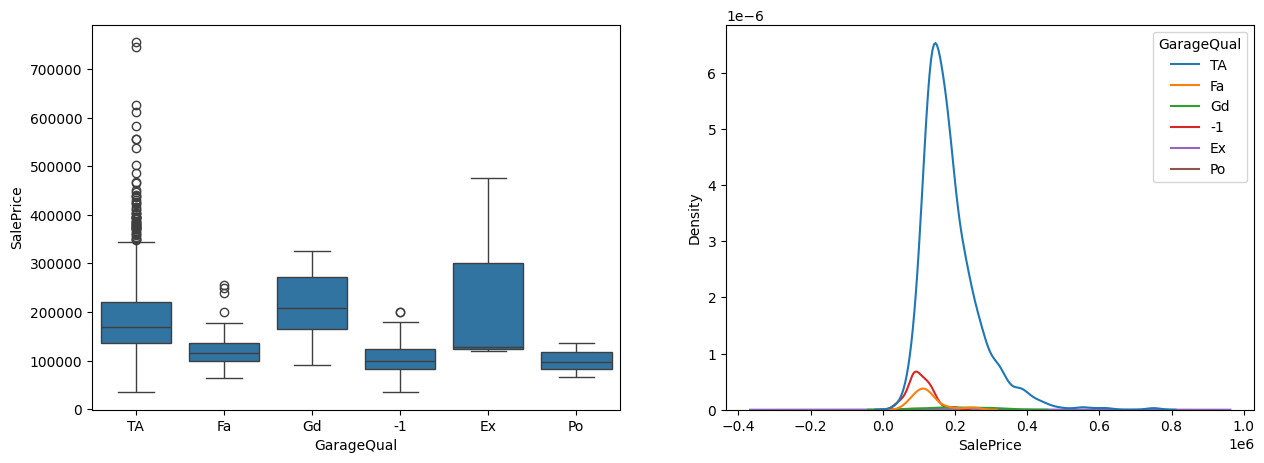

In [56]:
# Graficamente
coluna = 'GarageQual'


fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(x=train[coluna],y=train.SalePrice,ax=ax[0])
sns.kdeplot(x=train.SalePrice,hue=train[coluna],ax=ax[1])

plt.show()



*   Existem várias colunas de garagem (isso na etapa de Data Cleaning), então poderá visualizar essas informações



In [57]:
# Verificando as colunas que possuem garagem no nome
cols_garagem = train.columns[train.columns.str.contains('Garage')]
cols_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [58]:
train[cols_garagem].head(5)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA


In [59]:
# Fazendo o value_counts das colunas de Qualidade e Condição
train[['GarageQual','GarageCond']].value_counts()

GarageQual  GarageCond
TA          TA            1291
-1          -1              81
Fa          TA              24
            Fa              20
TA          Fa              15
Gd          TA              10
TA          Gd               5
Fa          Po               4
Gd          Gd               4
Po          Po               3
Ex          Ex               2
            TA               1
dtype: int64

In [60]:
# Contando em quantas colunas temos GarageQual == GarageCond
train[train.GarageQual == train.GarageCond].shape[0]/train.shape[0]

0.9595890410958904



*   Poderá apagar a coluna "GarageCond" pois a informação nessa coluna diz basicamente a mesma coisa que a coluna "GarageQual"



In [61]:
# Apagando a coluna GarageCond
train = train.drop('GarageCond',axis=1)



*   Da mesma forma, também podemos analisar a relação entre "GarageCars" e "GarageArea"



In [62]:
# Analisando a correlação entre as duas colunas e o preço
train[['GarageCars','GarageArea','SalePrice']].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.882475,0.640409
GarageArea,0.882475,1.000000,0.623431
SalePrice,0.640409,0.623431,1.000000


In [63]:
# Eliminando a coluna GarageArea
train = train.drop('GarageArea',axis=1)

In [64]:
# Verificando as colunas que possuem garagem no nome
cols_garagem = train.columns[train.columns.str.contains('Garage')]
cols_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageQual'],
      dtype='object')

- Continuar tratando as colunas de garagem, mas relacionando com outras informações da base como "YearBuilt" e "YearRemodAdd"

In [65]:
# Analisando a correlação entre as datas de construção
train[['GarageYrBlt','YearBuilt','YearRemodAdd','SalePrice']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
GarageYrBlt,1.000000,0.272009,0.146341,0.261354
YearBuilt,0.272009,1.000000,0.592855,0.522897
YearRemodAdd,0.146341,0.592855,1.000000,0.507101
SalePrice,0.261354,0.522897,0.507101,1.000000


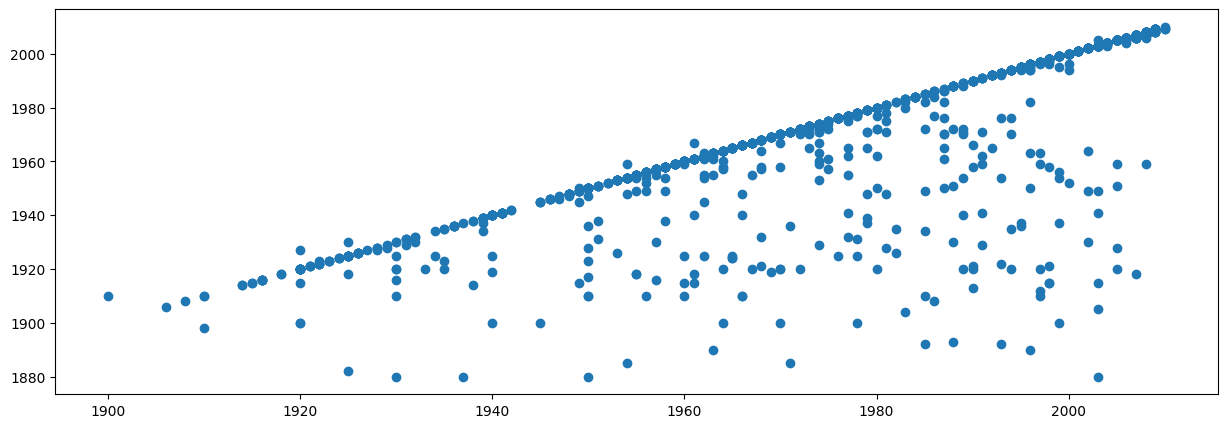

In [66]:
# Visualizando graficamente a correlação entre GarageYrBlt e YearBuilt
fig, ax = plt.subplots(figsize=(15,5))

# ax.scatter(train.GarageYrBlt,train.YearBuilt)
ax.scatter(train.loc[train.GarageYrBlt != -1, 'GarageYrBlt'], train.loc[train.GarageYrBlt != -1, 'YearBuilt'])

plt.show()

In [67]:
# Retirando da base os valores onde o ano é -1 (sem garagem)
train.loc[train.GarageYrBlt != -1,['GarageYrBlt','YearBuilt','YearRemodAdd','SalePrice']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
GarageYrBlt,1.000000,0.825667,0.642277,0.486362
YearBuilt,0.825667,1.000000,0.618058,0.507584
YearRemodAdd,0.642277,0.618058,1.000000,0.505434
SalePrice,0.486362,0.507584,0.505434,1.000000


In [68]:
# Também podemos eliminar essa coluna de GarageYrBlt
train = train.drop('GarageYrBlt',axis=1)

Continuar tratando as colunas de garagem ou apenas transformar o restante das colunas de texto
- Utilizando o OneHotEncoder para a coluna "GarageType"
  - [neHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- E o OrdinalEncoder para as colunas "GarageFinish" e "GarageQual"
  - [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

In [69]:
# Visualizando os valores em "GarageType"
train.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
-1          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [70]:
# Criando um encoder para GarageType
ohe_GarageType = OneHotEncoder(handle_unknown='ignore',
                              min_frequency=25)

In [71]:
# Fazendo o fit
ohe_GarageType = ohe_GarageType.fit(train[['GarageType']])

In [72]:
# Fazendo o transform já em um DataFrame
ohe_GarageType_df = pd.DataFrame(ohe_GarageType.transform(train[['GarageType']]).toarray(),
                              columns=ohe_GarageType.get_feature_names_out())
ohe_GarageType_df.head()

,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [73]:
# Unindo essa coluna com a base
train = pd.concat([train,ohe_GarageType_df],axis=1)

In [74]:
# Eliminando a coluna "GarageType"
train = train.drop('GarageType',axis=1)

O OrdinalEncoder para as outras 2 colunas
* GarageFinish: Interior finish of the garage
  * Fin: Finished
  * RFn: Rough Finished
  * Unf: Unfinished
  * NA: No Garage -> usamos o -1
* GarageQual: Garage quality
  * Ex: Excellent
  * Gd: Good
  * TA: Typical/Average
  * Fa: Fair
  * Po: Poor
  * NA: No Garage

In [75]:
# Criando a lista de ordem dos valores
GarageFinish_oe = ['Unf','RFn','Fin']
GarageQual_oe = ['Po','Fa','TA','Gd','Ex']

In [76]:
# Importando o OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [77]:
# Criando o encoder
oe_garagem = OrdinalEncoder(categories=[GarageFinish_oe,GarageQual_oe],
                   handle_unknown='use_encoded_value',
                   unknown_value=-1, dtype='int32')

In [78]:
# Fazendo o fit com os dados
oe_garagem = oe_garagem.fit(train[['GarageFinish','GarageQual']])

In [79]:
# Transformando
oe_garagem.transform(train[['GarageFinish','GarageQual']])

array([[1, 2],
       [1, 2],
       [1, 2],
       ...,
       [1, 2],
       [0, 2],
       [2, 2]], dtype=int32)

In [80]:
# Substituindo na base de treino
train[['GarageFinishCheck','GarageQualCheck']] = train[['GarageFinish','GarageQual']]
train[['GarageFinish','GarageQual']] = oe_garagem.transform(train[['GarageFinish','GarageQual']])

In [81]:
train.head(3)

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn,GarageFinishCheck,GarageQualCheck
0,1,60,65.0,8450,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,RFn,TA
1,2,20,80.0,9600,Pave,-1,Reg,Lvl,FR2,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,RFn,TA
2,3,60,68.0,11250,Pave,-1,IR1,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,RFn,TA


In [82]:
# Agrupando os dados de GarageFinish
train[['GarageFinishCheck','GarageFinish']].value_counts()

GarageFinishCheck  GarageFinish
Unf                 0              605
RFn                 1              422
Fin                 2              352
-1                 -1               81
dtype: int64

In [83]:
# E de GarageQual
train[['GarageQualCheck','GarageQual']].value_counts()

GarageQualCheck  GarageQual
TA                2            1311
-1               -1              81
Fa                1              48
Gd                3              14
Ex                4               3
Po                0               3
dtype: int64

In [84]:
# E então apagando essas duas colunas de check
train = train.drop(['GarageFinishCheck','GarageQualCheck'],axis=1)

Os tratamentos para a *base de teste*

In [85]:
# Apagando a coluna "GarageCond"
test = test.drop('GarageCond',axis=1)

In [86]:
# Eliminando a coluna GarageArea
test = test.drop('GarageArea',axis=1)

In [87]:
# Também podemos eliminar essa coluna de GarageYrBlt
test = test.drop('GarageYrBlt',axis=1)

In [88]:
# Utilizando o encoder do 'GarageType'
ohe_GarageType_df = pd.DataFrame(ohe_GarageType.transform(test[['GarageType']]).toarray(),
                              columns=ohe_GarageType.get_feature_names_out())

test = pd.concat([test,ohe_GarageType_df],axis=1)

test = test.drop('GarageType',axis=1)

In [89]:
# Utilizando o OrdinalEncoder para as colunas 'GarageFinish' e 'GarageQual'
test[['GarageFinish','GarageQual']] = oe_garagem.transform(test[['GarageFinish','GarageQual']])

In [91]:
# Exportando a base
train.to_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/Resultados/train_3.csv',index=False)
test.to_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/Resultados/test_3.csv',index=False)

### Finalizando o tratamento das outras colunas que ainda estão como texto

In [92]:
# Verificando novamente a quantidade de colunas de cada tipo
train.dtypes.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


int64      35
object     35
float64    13
int32       2
dtype: int64

In [126]:
# Visualizando o nome das colunas
train.columns[train.dtypes.values == 'object']

Index([], dtype='object')

Podemos separar agora as colunas em 2 grupos: um que podemos fazer o OneHotEncoder e outra que podemos fazer o OrdinalEncoder

In [94]:
# Separando as colunas pelos índices
colunas_ohe = [0,1,3,4,6,7,8,9,10,11,12,13,14,15,18,24,26,28,31,32,33,34]
colunas_oe = [2,5,16,17,19,20,21,22,23,25,27,29,30]

In [97]:
# Podemos visualizar as colunas do ohe
cols_ohe = train.columns[train.dtypes.values == 'object'][colunas_ohe]
cols_ohe

Index(['Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'Functional', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [114]:
# E do oe
cols_oe = train.columns[train.dtypes.values == 'object'][colunas_oe]
cols_oe

Index(['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'PoolQC'],
      dtype='object')

In [98]:
# Definindo a ordem dos valores de cada coluna do OrdinalEncoder
dados_oe = []
dados_oe.append(['IR3','IR2','IR1','Reg']) # LotShape
dados_oe.append(['Gtl','Mod','Sev']) # LandSlope
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # ExterQual
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # ExterCond
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # BsmtQual
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # BsmtCond
dados_oe.append(['No','Mn','Av','Gd']) # BsmtExposure
dados_oe.append(['Unf','LwQ','Rec','BLQ','ALQ','GLQ']) # BsmtFinType1
dados_oe.append(['Unf','LwQ','Rec','BLQ','ALQ','GLQ']) # BsmtFinType2
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # HeatingQC
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # KitchenQual
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # FireplaceQu
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # PoolQC



*   **Fazendo o OneHotEncoder**



In [99]:
# Criando o encoder
ohe = OneHotEncoder(handle_unknown='infrequent_if_exist',
                   min_frequency=50,
                   drop='if_binary',
                   dtype='int64'
                   )

In [102]:
# Selecionando a base do ohe
dados_ohe = train[cols_ohe]
dados_ohe.head(3)

,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal
1,Pave,-1,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,MetalSd,None,CBlock,GasA,SBrkr,Typ,-1,-1,WD,Normal
2,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal


In [103]:
# Fit
ohe = ohe.fit(dados_ohe)

In [105]:
# Fazendo o transform já em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(dados_ohe).toarray(),
                     columns=ohe.get_feature_names_out())
ohe_df.head(6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Street_infrequent_sklearn,Alley_-1,Alley_Grvl,Alley_infrequent_sklearn,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LandContour_infrequent_sklearn,LotConfig_Corner,LotConfig_CulDSac,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0


In [106]:
# Unindo essa coluna com a base
train = pd.concat([train,ohe_df],axis=1)

**Dados de Teste**

In [107]:
# Selecionando a base do ohe
dados_ohe_teste = test[cols_ohe]
dados_ohe_teste.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,-1,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,...,VinylSd,None,CBlock,GasA,SBrkr,Typ,MnPrv,-1,WD,Normal
1,Pave,-1,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,...,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Typ,-1,Gar2,WD,Normal
2,Pave,-1,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,None,PConc,GasA,SBrkr,Typ,MnPrv,-1,WD,Normal


In [108]:
# Fazendo o ohe para teste
ohe_df = pd.DataFrame(ohe.transform(dados_ohe_teste).toarray(),
                     columns=ohe.get_feature_names_out())

teste = pd.concat([test,ohe_df],axis=1)
teste.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,1461,20,80.0,11622,Pave,-1,Reg,Lvl,Inside,Gtl,...,1,0,0,0,1,0,0,1,0,0
1,1462,20,81.0,14267,Pave,-1,IR1,Lvl,Corner,Gtl,...,0,0,1,0,1,0,0,1,0,0
2,1463,60,74.0,13830,Pave,-1,IR1,Lvl,Inside,Gtl,...,1,0,0,0,1,0,0,1,0,0




*   **Fazendo o OrdinalEncoder**



In [109]:
# Criando o encoder
oe = OrdinalEncoder(categories=dados_oe,
                     handle_unknown='use_encoded_value',
                     unknown_value=-1,
                     dtype='int64'
                    )

In [115]:
# Selecionando a base do oe
dados_oe = train[cols_oe]
dados_oe.head(3)

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,PoolQC
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,-1,-1
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,-1
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,-1


In [116]:
# Fazando o fit
oe = oe.fit(dados_oe)

In [119]:
# Fazendo o transform já na base
train[cols_oe] = oe.transform(dados_oe)

In [121]:
# Selecionando a base do oe
dados_oe_teste = test[cols_oe]
dados_oe_teste.head(3)

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,PoolQC
0,Reg,Gtl,TA,TA,TA,TA,No,Rec,LwQ,TA,TA,-1,-1
1,IR1,Gtl,TA,TA,TA,TA,No,ALQ,Unf,TA,Gd,-1,-1
2,IR1,Gtl,TA,TA,Gd,TA,No,GLQ,Unf,Gd,TA,TA,-1


In [122]:
# Transformando
test[cols_oe] = oe.transform(dados_oe_teste)



*   Eliminando as colunas do ohe



In [ ]:
# Eliminando as colunas do ohe
train = train.drop(cols_ohe,axis=1)
test = test.drop(cols_ohe,axis=1)

In [127]:
train.dtypes.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


int64      131
float64     13
int32        2
dtype: int64



*   Para finalizar, podemos extrair essa base para o excel



In [128]:
# Exportando para o excel
train.to_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/Resultados/train_3_2.csv',index=False)
test.to_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/Resultados/test_3_2.csv',index=False)